In [1]:
#impport libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
HousingPrice_dataset = pd.read_csv('C:/Users/rakti/OneDrive/datasets/Housing.csv')

In [3]:
HousingPrice_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
HousingPrice_dataset.shape

(545, 13)

In [5]:
HousingPrice_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
HousingPrice_dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
HousingPrice_dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


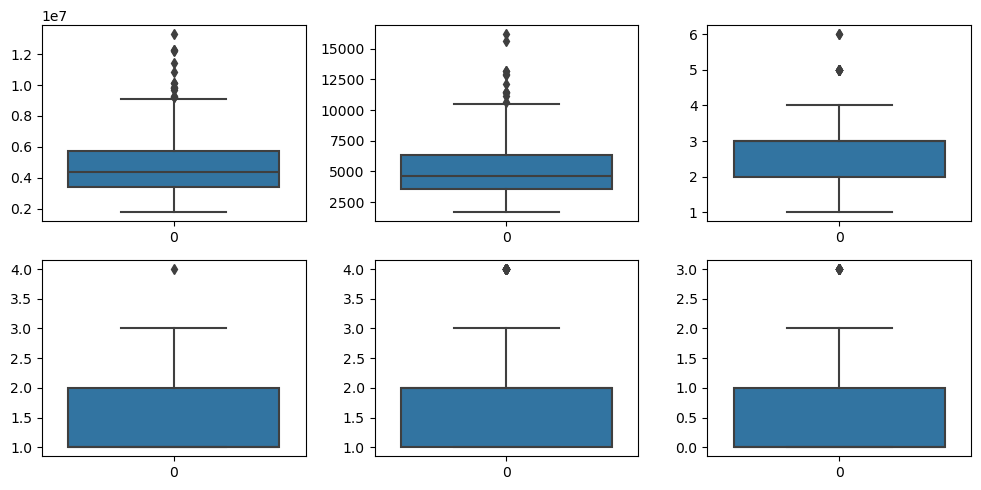

In [8]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(HousingPrice_dataset['price'], ax = axs[0,0])
plt2 = sns.boxplot(HousingPrice_dataset['area'], ax = axs[0,1])
plt3 = sns.boxplot(HousingPrice_dataset['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(HousingPrice_dataset['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(HousingPrice_dataset['stories'], ax = axs[1,1])
plt3 = sns.boxplot(HousingPrice_dataset['parking'], ax = axs[1,2])

plt.tight_layout()

In [9]:
# Calculate Q1 and Q3
Q1 = HousingPrice_dataset['price'].quantile(0.25)
Q3 = HousingPrice_dataset['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = HousingPrice_dataset[( HousingPrice_dataset['price'] < lower_bound) | ( HousingPrice_dataset['price'] > upper_bound)]

# Print outliers
print(outliers)


       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   9681000   6000         

In [10]:
# Define lower and upper percentile limits
lower_cap = HousingPrice_dataset['price'].quantile(0.01)
upper_cap = HousingPrice_dataset['price'].quantile(0.99)

# Cap outliers
HousingPrice_dataset['price'] = np.where(HousingPrice_dataset['price'] < lower_cap, lower_cap, HousingPrice_dataset['price'])
HousingPrice_dataset['price'] = np.where(HousingPrice_dataset['price'] > upper_cap, upper_cap, HousingPrice_dataset['price'])


Data Visualisation

C:\Users\rakti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rakti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rakti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rakti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

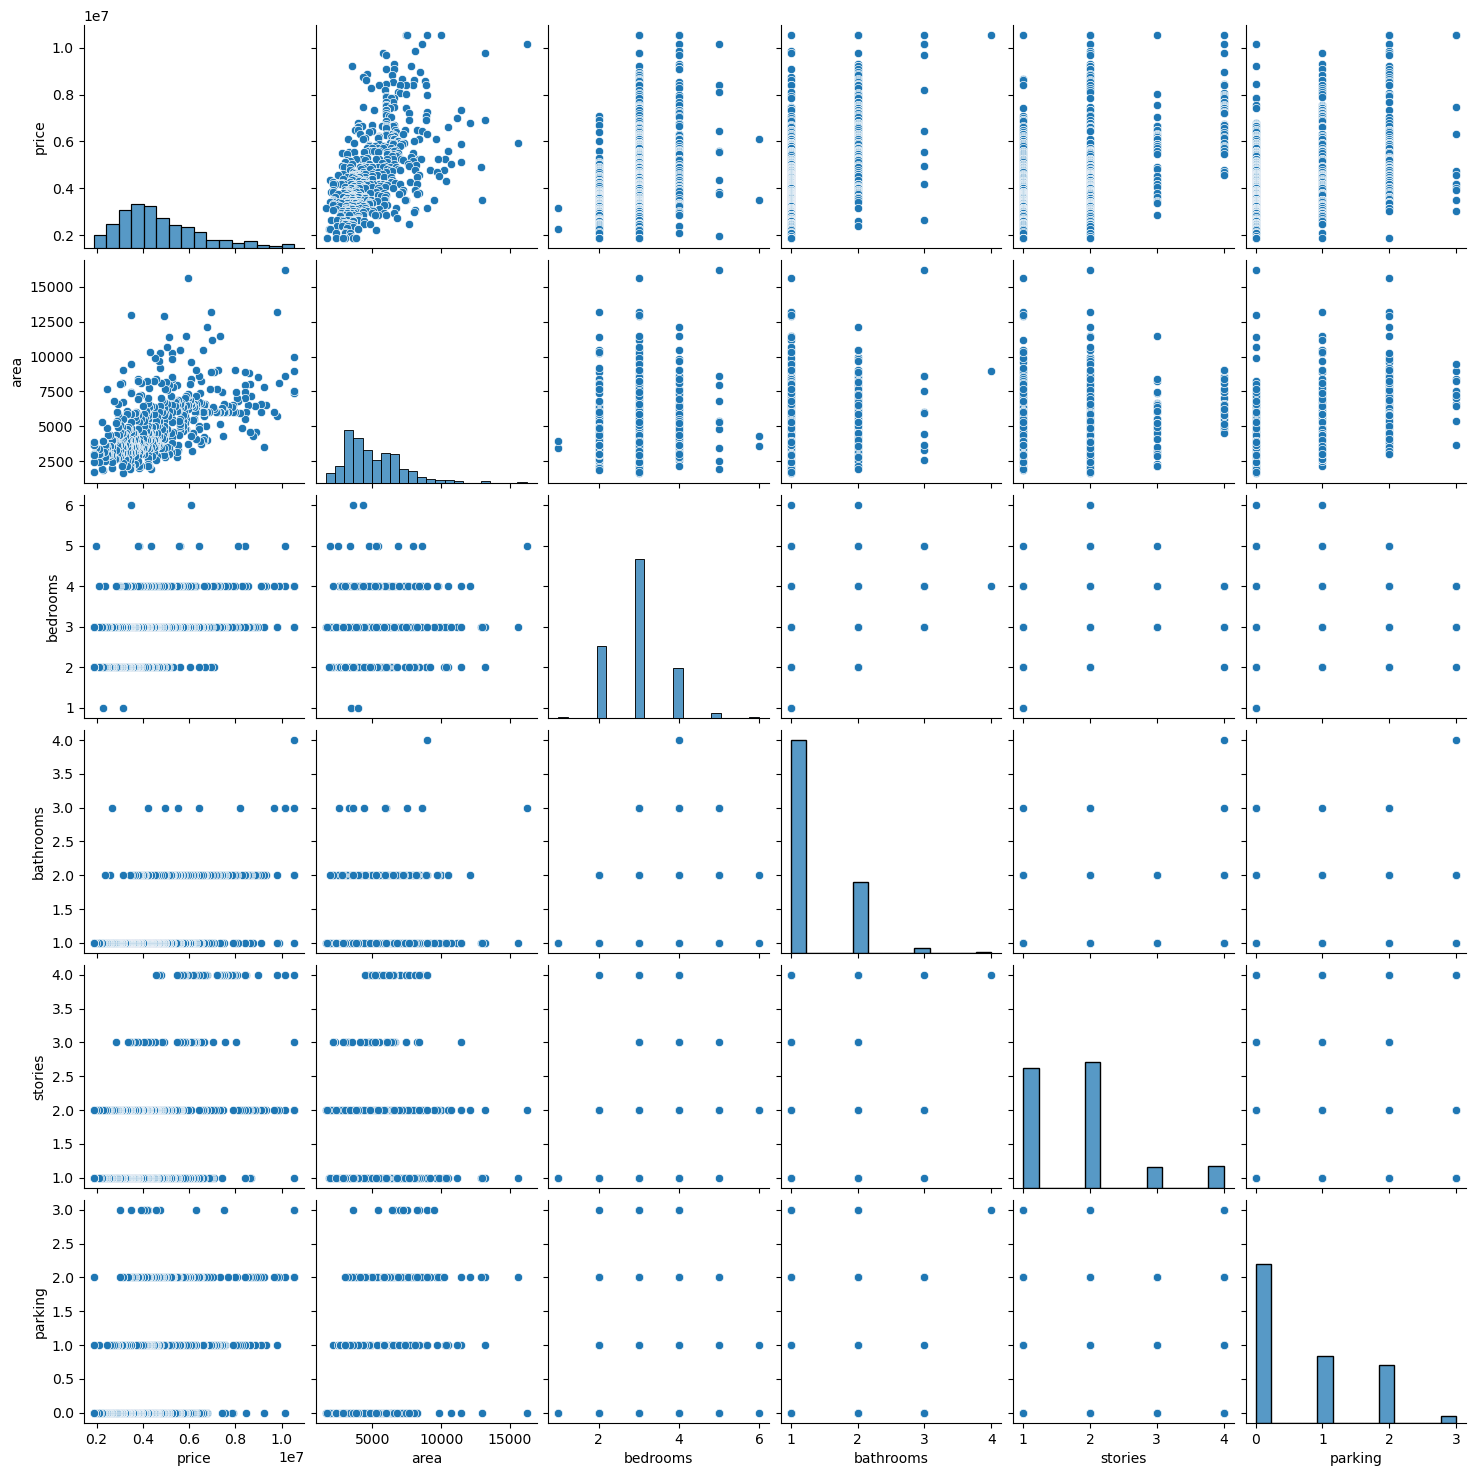

In [11]:
sns.pairplot(HousingPrice_dataset)

C:\Users\rakti\AppData\Local\Temp\ipykernel_19432\2124579805.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HousingPrice_dataset.price, kde = True)
C:\Users\rakti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

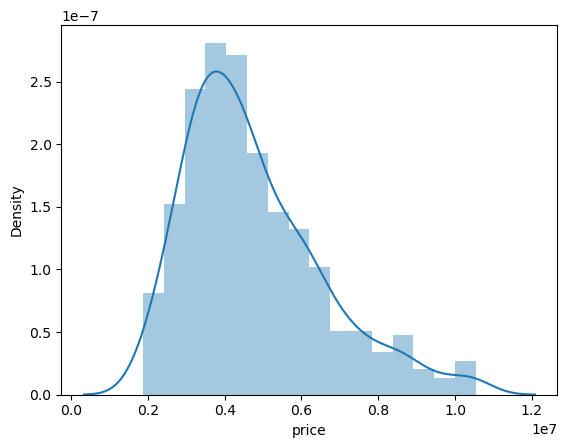

In [12]:
sns.distplot(HousingPrice_dataset.price , kde = True)

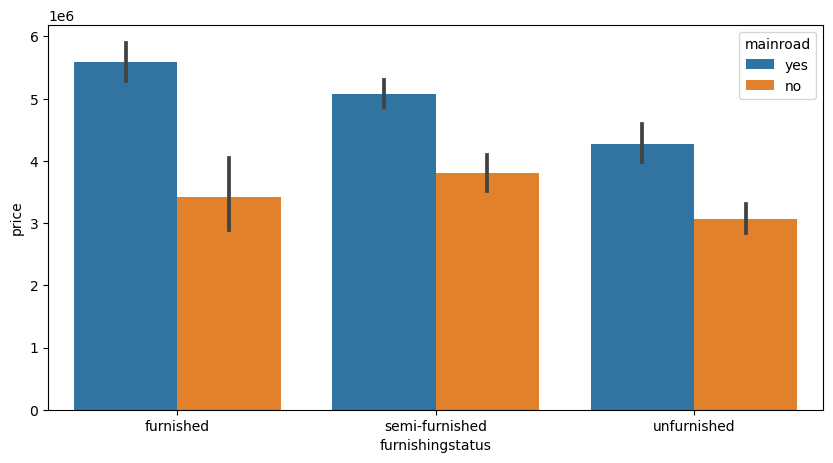

In [13]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'furnishingstatus', y = 'price', hue = 'mainroad', data = HousingPrice_dataset)
plt.show()

In [14]:
#assign X & y as varibales
X = HousingPrice_dataset.drop(['price'],axis =1)
y = HousingPrice_dataset.price

In [15]:
print(X)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [16]:
print(y)

0      10542000.0
1      10542000.0
2      10542000.0
3      10542000.0
4      10542000.0
          ...    
540     1870400.0
541     1870400.0
542     1870400.0
543     1870400.0
544     1870400.0
Name: price, Length: 545, dtype: float64


In [17]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming X is a DataFrame
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Loop through the categorical columns and apply LabelEncoder to each
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

print(X)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea furnishingstatus  
0                  0               

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Encode categorical columns using OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['furnishingstatus'])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1. 0. 0. ... 1. 2. 1.]
 [1. 0. 0. ... 1. 3. 0.]
 [0. 1. 0. ... 0. 2. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [19]:
#train Variables
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
print(X_train)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [21]:
print(X_test)

[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 2. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 2. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [22]:
print(y_train)

498    2660000.0
531    2233000.0
532    2135000.0
278    4277000.0
101    6230000.0
         ...    
70     6790000.0
277    4305000.0
9      9800000.0
359    3710000.0
192    5040000.0
Name: price, Length: 408, dtype: float64


In [23]:
print(y_test)

239     4585000.0
113     6083000.0
325     4007500.0
66      6930000.0
479     2940000.0
          ...    
319     4060000.0
525     2345000.0
245     4550000.0
7      10150000.0
375     3640000.0
Name: price, Length: 137, dtype: float64


In [24]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
print(X_train)

[[-0.5735767   1.17727011 -0.70710678 ... -0.71492035 -0.82872033
  -0.58112384]
 [-0.5735767  -0.84942274  1.41421356 ...  1.39875721 -0.82872033
   1.72080361]
 [-0.5735767  -0.84942274  1.41421356 ... -0.71492035 -0.82872033
  -0.58112384]
 ...
 [-0.5735767  -0.84942274  1.41421356 ...  1.39875721  0.30972376
   1.72080361]
 [-0.5735767  -0.84942274  1.41421356 ... -0.71492035  0.30972376
  -0.58112384]
 [ 1.743446   -0.84942274 -0.70710678 ... -0.71492035 -0.82872033
   1.72080361]]


In [26]:
print(X_test)

[[ 1.743446   -0.84942274 -0.70710678 ... -0.71492035  0.30972376
  -0.58112384]
 [ 1.743446   -0.84942274 -0.70710678 ... -0.71492035  1.44816784
   1.72080361]
 [-0.5735767   1.17727011 -0.70710678 ...  1.39875721 -0.82872033
  -0.58112384]
 ...
 [-0.5735767  -0.84942274  1.41421356 ... -0.71492035  1.44816784
   1.72080361]
 [-0.5735767  -0.84942274  1.41421356 ... -0.71492035 -0.82872033
  -0.58112384]
 [-0.5735767  -0.84942274  1.41421356 ... -0.71492035 -0.82872033
  -0.58112384]]


In [27]:
import statsmodels.api as sm

# Add a constant (intercept term) to the model
X_train_ols = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Print the summary of the OLS regression
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     67.22
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.09e-91
Time:                        20:09:51   Log-Likelihood:                -6225.5
No. Observations:                 408   AIC:                         1.248e+04
Df Residuals:                     394   BIC:                         1.254e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.791e+06   5.16e+04     92.829      0.0

In [28]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 3903203.38  4585000.  ]
 [ 5948135.25  6083000.  ]
 [ 4547431.77  4007500.  ]
 [ 7135805.55  6930000.  ]
 [ 2785308.65  2940000.  ]
 [ 7043264.47  6195000.  ]
 [ 3210577.02  3535000.  ]
 [ 3240720.34  2940000.  ]
 [ 3418716.16  3500000.  ]
 [ 8135329.93  7980000.  ]
 [ 6583280.94  6755000.  ]
 [ 3688694.59  3990000.  ]
 [ 3873576.58  3150000.  ]
 [ 4584416.89  3290000.  ]
 [ 4042466.4   4130000.  ]
 [ 1932844.78  2660000.  ]
 [ 4109343.84  4410000.  ]
 [ 3731645.06  3710000.  ]
 [ 3263510.    3360000.  ]
 [ 4549572.64  4270000.  ]
 [ 6023669.    5005000.  ]
 [ 6457731.38  5383000.  ]
 [ 4804894.31  6440000.  ]
 [ 2724761.9   1890000.  ]
 [ 5232262.32  6125000.  ]
 [ 5706747.33  5460000.  ]
 [ 5305125.06  5803000.  ]
 [ 5686115.25  4620000.  ]
 [ 5731169.73  5530000.  ]
 [ 5643949.81  5950000.  ]
 [ 3432228.66  4305000.  ]
 [ 6450020.29  3640000.  ]
 [ 7066467.26  5250000.  ]
 [ 2937743.92  3325000.  ]
 [ 4519896.91  3703000.  ]
 [ 5210656.42  4753000.  ]
 [ 5011776.88  9100000.  ]
 

In [30]:
#Calculate R^2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6833953068753236

In [31]:
print(regressor.coef_)
print(regressor.intercept_)

[  63503.12   66957.2  -128222.94  482754.89   80289.26  460701.5
  391612.    178144.76  197454.66  150499.85  250095.77  414885.98
  179953.01  264235.62]
4790569.583333333


In [32]:
#Decison TRee Regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [33]:
y_pred1 = regressor.predict(X_test)
np.set_printoptions(precision=2)
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[ 4480000.  4585000.]
 [ 5250000.  6083000.]
 [ 5145000.  4007500.]
 [ 5600000.  6930000.]
 [ 2940000.  2940000.]
 [ 6650000.  6195000.]
 [ 3430000.  3535000.]
 [ 3360000.  2940000.]
 [ 3430000.  3500000.]
 [ 8575000.  7980000.]
 [ 5775000.  6755000.]
 [ 3500000.  3990000.]
 [ 3640000.  3150000.]
 [ 4480000.  3290000.]
 [ 4480000.  4130000.]
 [ 2240000.  2660000.]
 [ 3780000.  4410000.]
 [ 4480000.  3710000.]
 [ 3640000.  3360000.]
 [ 3570000.  4270000.]
 [ 9240000.  5005000.]
 [ 9681000.  5383000.]
 [ 5740000.  6440000.]
 [ 2100000.  1890000.]
 [ 6510000.  6125000.]
 [ 6405000.  5460000.]
 [ 5229000.  5803000.]
 [ 5950000.  4620000.]
 [ 4767000.  5530000.]
 [ 3990000.  5950000.]
 [ 3605000.  4305000.]
 [ 4900000.  3640000.]
 [ 6020000.  5250000.]
 [ 3220000.  3325000.]
 [ 3920000.  3703000.]
 [ 5950000.  4753000.]
 [ 5495000.  9100000.]
 [ 3640000.  3500000.]
 [ 2660000.  3150000.]
 [ 4200000.  4270000.]
 [ 8575000.  8960000.]
 [ 5600000.  4060000.]
 [ 5250000.  5740000.]
 [ 2940000.

In [34]:
#Calculate R^2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.24608489776724407

In [35]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [36]:
y_pred2 = regressor.predict(X_test)
np.set_printoptions(precision=2)
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
print(np.concatenate((y_pred1.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[ 4480000.  4585000.]
 [ 5250000.  6083000.]
 [ 5145000.  4007500.]
 [ 5600000.  6930000.]
 [ 2940000.  2940000.]
 [ 6650000.  6195000.]
 [ 3430000.  3535000.]
 [ 3360000.  2940000.]
 [ 3430000.  3500000.]
 [ 8575000.  7980000.]
 [ 5775000.  6755000.]
 [ 3500000.  3990000.]
 [ 3640000.  3150000.]
 [ 4480000.  3290000.]
 [ 4480000.  4130000.]
 [ 2240000.  2660000.]
 [ 3780000.  4410000.]
 [ 4480000.  3710000.]
 [ 3640000.  3360000.]
 [ 3570000.  4270000.]
 [ 9240000.  5005000.]
 [ 9681000.  5383000.]
 [ 5740000.  6440000.]
 [ 2100000.  1890000.]
 [ 6510000.  6125000.]
 [ 6405000.  5460000.]
 [ 5229000.  5803000.]
 [ 5950000.  4620000.]
 [ 4767000.  5530000.]
 [ 3990000.  5950000.]
 [ 3605000.  4305000.]
 [ 4900000.  3640000.]
 [ 6020000.  5250000.]
 [ 3220000.  3325000.]
 [ 3920000.  3703000.]
 [ 5950000.  4753000.]
 [ 5495000.  9100000.]
 [ 3640000.  3500000.]
 [ 2660000.  3150000.]
 [ 4200000.  4270000.]
 [ 8575000.  8960000.]
 [ 5600000.  4060000.]
 [ 5250000.  5740000.]
 [ 2940000.

In [37]:
#Calculate R^2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.5604534614111941

In [38]:
#Multiple linear Regression is appropriate for this dataset

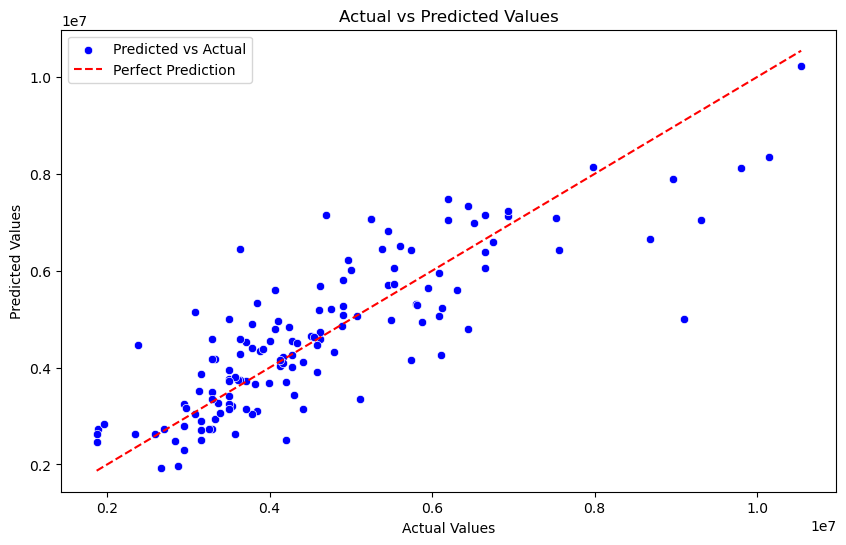

In [39]:
# Assuming y_pred contains predicted values and y_test contains actual values
plt.figure(figsize=(10, 6))

# Scatter plot to show actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicted vs Actual")

# Add a perfect prediction line (45-degree line)
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label="Perfect Prediction")

# Set labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()

plt.show()
